In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [3]:
images_path = '../input/flickr8k-sau/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [4]:
from keras.applications import ResNet50

In [5]:
from keras.models import load_model


In [6]:

incept_model = ResNet50(include_top=True)

# resnet = load_model('../input/resnet/resnet50_weights_tf_dim_ordering_tf_kernels.h5')


102973440/102967424 [==============================] - 1s 0us/step


In [7]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [8]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [14]:
len(images_features)

1500

In [15]:
caption_path = '../input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'


In [16]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [17]:
captions

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [18]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [19]:
captions_dict

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1007129816_e794419615.jpg': ['A man in an orange hat starring at something .',
  'A man wears an orange hat and glasses .',
  'A man with gauges and glasses is wearing a Blitz hat .',
  'A man with glasses is wearing a beer can crocheted hat .',
  'The man with pierced ears is wearing glasses and an orange hat .'],
 '1019077836_6fc9b15408.jpg': ['A brown dog chases the water from a sprinkler on a lawn .',
  'a brown dog plays with the hose .',
  'A brown dog running on a lawn near a garden hose',
  'A dog is playing with a hose .',
  'Large brown dog running away from the sprinkler in the grass .'],
 '1022454428_b6b660a67b.jpg': ['A couple and an infant , being he

In [20]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [21]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [22]:
count_words = {}
count=1
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
                count_words[word] = count
                count+=1

In [23]:
count_words

{'startofseq': 1,
 'a': 2,
 'child': 3,
 'in': 4,
 'pink': 5,
 'dress': 6,
 'is': 7,
 'climbing': 8,
 'up': 9,
 'set': 10,
 'of': 11,
 'stairs': 12,
 'an': 13,
 'entry': 14,
 'way': 15,
 '.': 16,
 'endofseq': 17,
 'girl': 18,
 'going': 19,
 'into': 20,
 'wooden': 21,
 'building': 22,
 'little': 23,
 'playhouse': 24,
 'the': 25,
 'to': 26,
 'her': 27,
 'cabin': 28,
 'man': 29,
 'orange': 30,
 'hat': 31,
 'starring': 32,
 'at': 33,
 'something': 34,
 'wears': 35,
 'and': 36,
 'glasses': 37,
 'with': 38,
 'gauges': 39,
 'wearing': 40,
 'blitz': 41,
 'beer': 42,
 'can': 43,
 'crocheted': 44,
 'pierced': 45,
 'ears': 46,
 'brown': 47,
 'dog': 48,
 'chases': 49,
 'water': 50,
 'from': 51,
 'sprinkler': 52,
 'on': 53,
 'lawn': 54,
 'plays': 55,
 'hose': 56,
 'running': 57,
 'near': 58,
 'garden': 59,
 'playing': 60,
 'large': 61,
 'away': 62,
 'grass': 63,
 'couple': 64,
 'infant': 65,
 ',': 66,
 'being': 67,
 'held': 68,
 'by': 69,
 'male': 70,
 'sitting': 71,
 'next': 72,
 'pond': 73,
 'str

In [24]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
                encoded.append(count_words[word])
            


        captions_dict[k][vv.index(v)] = encoded

In [25]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1007129816_e794419615.jpg': [[1, 2, 29, 4, 13, 30, 31, 32, 33, 34, 16, 17],
  [1, 2, 29, 35, 13, 30, 31, 36, 37, 16, 17],
  [1, 2, 29, 38, 39, 36, 37, 7, 40, 2, 41, 31, 16, 17],
  [1, 2, 29, 38, 37, 7, 40, 2, 42, 43, 44, 31, 16, 17],
  [1, 25, 29, 38, 45, 46, 7, 40, 37, 36, 13, 30, 31, 16, 17]],
 '1019077836_6fc9b15408.jpg': [[1,
   2,
   47,
   48,
   49,
   25,
   50,
   51,
   2,
   52,
   53,
   2,
   54,
   16,
   17],
  [1, 2, 47, 48, 55, 38, 25, 56, 16, 17],
  [1, 2, 47, 48, 57, 53, 2, 54, 58, 2, 59, 56, 17],
  [1, 2, 48, 7, 60, 38, 2, 56, 16, 17],
  [1, 61, 47, 48, 57, 62, 51, 25, 52, 4, 25, 63, 16, 17]],
 '1022454428_b6b660a67b.jpg

In [26]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [27]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 64, 36, 13, 65, 66, 67, 68, 69, 25, 70, 66, 71, 72, 26, 2, 73, 38, 2, 58, 69, 74, 16, 17]
[1, 390, 139, 263, 131, 152, 66, 184, 391, 392, 221, 2, 393, 394, 66, 184, 38, 395, 396, 397, 36, 343, 4, 27, 111, 66, 36, 184, 38, 398, 399, 16, 17]
[1, 2, 29, 38, 881, 53, 110, 395, 7, 150, 33, 25, 83, 38, 2, 178, 31, 36, 105, 975, 72, 26, 238, 230, 149, 4, 124, 11, 2, 105, 868, 480, 16, 17]


In [28]:
MAX_LEN

34

In [29]:

VOCAB_SIZE = len(count_words)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE+1)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [30]:
X, y_in, y_out = generator(images_features, captions_dict)

In [31]:
len(X), len(y_in), len(y_out)

(95726, 95726, 95726)

In [33]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [34]:
X.shape, y_in.shape, y_out.shape

((95726, 2048), (95726, 34), (95726, 4065))

In [35]:
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [36]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(count_words)|+1

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 34, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 128)           520320    
_________________________________________________________________
lstm (LSTM)                  (None, 34, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 34, 128)           32896     
Total params: 947,456
Traina

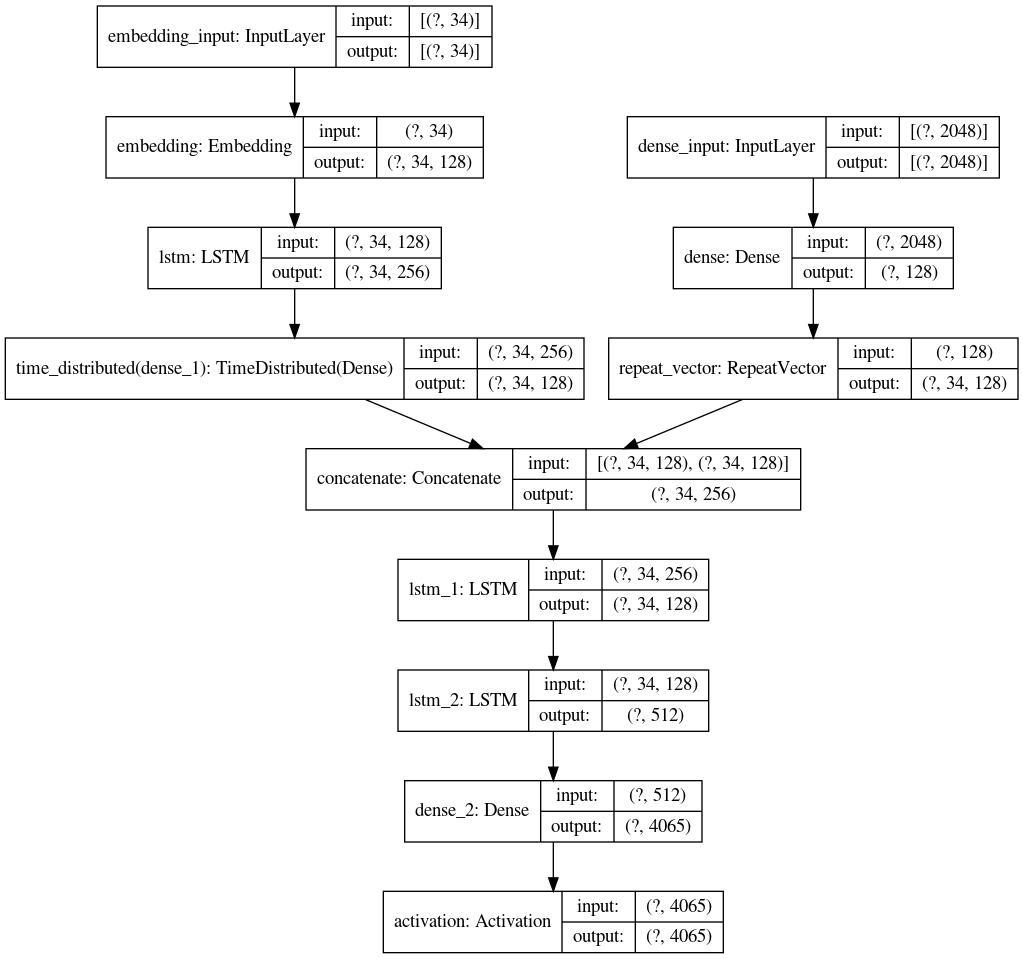

In [38]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [39]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
187/187 [==============================] - 12s 65ms/step - loss: 5.1431 - accuracy: 0.1471
Epoch 2/50
187/187 [==============================] - 12s 66ms/step - loss: 4.5395 - accuracy: 0.2360
Epoch 3/50
187/187 [==============================] - 12s 65ms/step - loss: 4.3300 - accuracy: 0.2597
Epoch 4/50
187/187 [==============================] - 12s 64ms/step - loss: 4.2047 - accuracy: 0.2698
Epoch 5/50
187/187 [==============================] - 13s 67ms/step - loss: 4.0417 - accuracy: 0.2841
Epoch 6/50
187/187 [==============================] - 12s 64ms/step - loss: 3.8128 - accuracy: 0.3092
Epoch 7/50
187/187 [==============================] - 12s 65ms/step - loss: 3.6291 - accuracy: 0.3296
Epoch 8/50
187/187 [==============================] - 12s 64ms/step - loss: 3.4768 - accuracy: 0.3446
Epoch 9/50
187/187 [==============================] - 12s 66ms/step - loss: 3.3518 - accuracy: 0.3588
Epoch 10/50
187/187 [==============================] - 12s 67ms/step - loss: 3.242

In [40]:
inv_dict = {v:k for k, v in count_words.items()}

In [41]:
images

['../input/flickr8k-sau/Flickr_Data/Images/3317145805_071b15debb.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/417577408_eb571658c1.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/3265864834_e0229020dd.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/3330675488_8692476a4a.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/393284934_d38e1cd6fe.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/35506150_cbdb630f4f.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/317641829_ab2607a6c0.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/2856524322_1d04452a21.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/3083016677_5782bc337c.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/3477778668_81ff0a68e0.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/3275065565_9e2a640fbc.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/2429212017_77fc107699.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/944374205_fd3e69bfca.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/2473293833_78820d2eaa.jpg',
 '../input/f

In [42]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [43]:
test_feature = modele.predict(getImage(2500)).reshape(1,2048)

In [44]:
test_feature

array([[0.12040707, 2.3736353 , 0.03874962, ..., 0.2344017 , 0.41475928,
        0.22795795]], dtype=float32)

In [46]:
text_inp = ['startofseq']
count = 0
caption = ''
while count < 25:
    count += 1
    encoded = []
    for i in text_inp:
        encoded.append(count_words[i])
    
    encoded = [encoded]
    encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)
    
    prediction = np.argmax(model.predict([test_feature, encoded]))
    
    sampled_word = inv_dict[prediction]
    
    caption = caption + ' ' + sampled_word
    
    if sampled_word == 'endofseq':
        break
        
    text_inp.append(sampled_word)

In [47]:
caption

' a football player touches a goal . endofseq'

In [49]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', count_words)